In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#1.	Data Cleaning and Preparation:


In [35]:
#Load the dataset into a data frame or equivalent data structure.
df = pd.read_csv(r"E:\DATA sCIENCE\Data set\Cardiotocographic.csv")
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [38]:
print(df.dtypes)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [39]:
#Handle missing values appropriately (e.g., imputation, deletion).
df.isna().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

<Axes: >

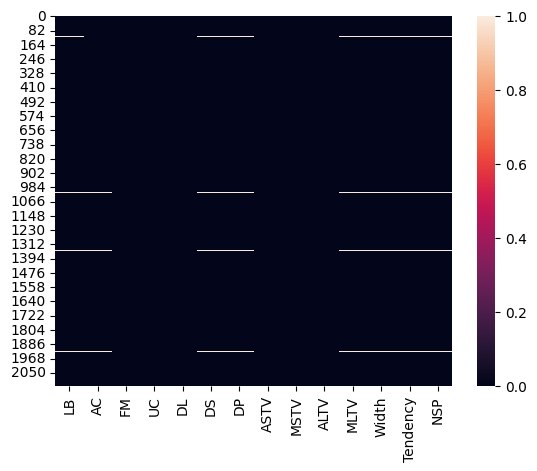

In [40]:
sns.heatmap(df.isna())

In [41]:
for i in df.isna().sum():
    print((i/len(df))*100)

0.9877704609595485
0.940733772342427
0.0
0.0
0.0
0.9877704609595485
0.9877704609595485
0.0
0.0
0.0
0.9877704609595485
0.9877704609595485
0.9877704609595485
0.9877704609595485


In [42]:
numeric_cols = df.select_dtypes(include = ['int64','float64']).columns
for col in numeric_cols:
    if df[col].isnull().sum()>0:
        if abs(df[col].skew())>1:
            df[col] = df[col].fillna(df[col].median())

        else:
            df[col] = df[col].fillna(df[col].mean())

In [43]:
df.isna().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [44]:
#Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [45]:
#Identify numeric-looking columns stored as 'object'
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Column '{col}' may have numeric data stored as strings.")

In [46]:
#Convert object columns to numeric (if possible)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce') 
print(df.dtypes)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


<Axes: >

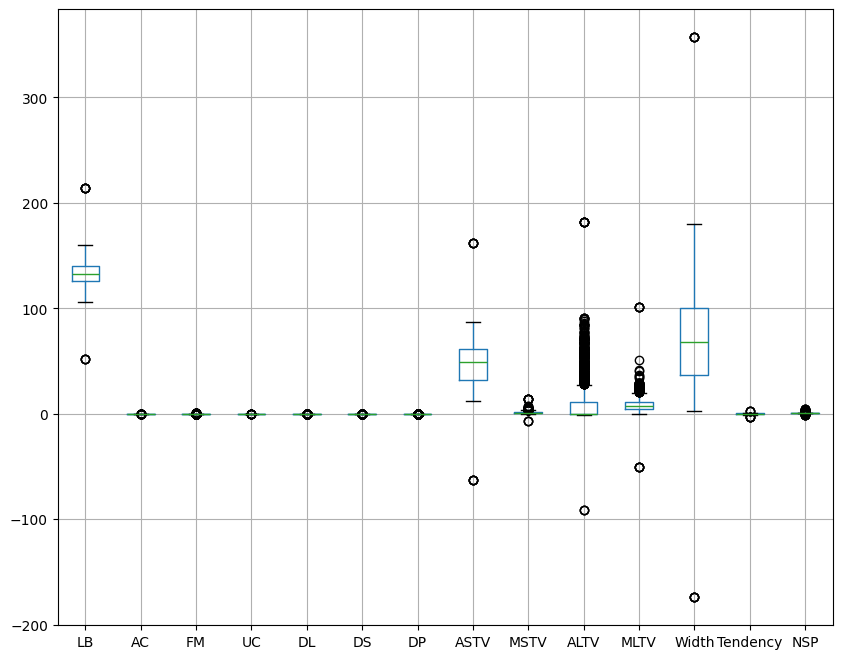

In [47]:
#Detect and treat outliers if necessary.
df.boxplot(figsize=(10,8))

In [48]:
for colname in df.select_dtypes(include='number').columns:   
    q1 = df[colname].quantile(0.25)
    q3 = df[colname].quantile(0.75)
    iqr = q3 - q1
    upper_extreme = q3 + (1.5 * iqr)
    lower_extreme = q1 - (1.5 * iqr)

    df.loc[df[colname] > upper_extreme, colname] = upper_extreme
    df.loc[df[colname] < lower_extreme, colname] = lower_extreme

    


<Axes: >

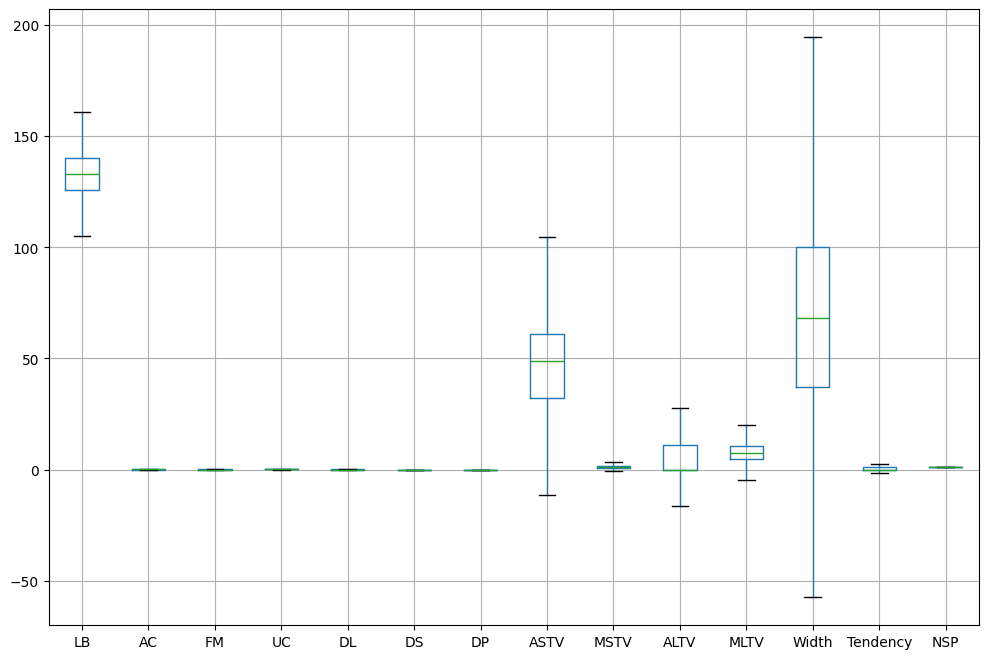

In [49]:
df.boxplot(figsize = (12,8))

In [17]:
#2.	Statistical Summary:

In [50]:
#Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) 
#and dispersion (standard deviation, interquartile range).

summary = df.describe().T  
summary['median'] = df.median()
summary['IQR'] = df.quantile(0.75) - df.quantile(0.25)

summary = summary[['mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max', 'IQR']]
print(summary)

                mean      median        std         min         25%  \
LB        133.293725  133.000000   9.930227  105.000000  126.000000   
AC          0.003132    0.001634   0.003828   -0.008409    0.000000   
FM          0.001568    0.000000   0.002485   -0.003850    0.000000   
UC          0.004362    0.004484   0.003001   -0.005177    0.001851   
DL          0.001770    0.000000   0.002668   -0.004934    0.000000   
DS          0.000000    0.000000   0.000000    0.000000    0.000000   
DP          0.000000    0.000000   0.000000    0.000000    0.000000   
ASTV       46.981873   49.000000  17.612745  -11.500000   32.000000   
MSTV        1.304644    1.200000   0.781091   -0.800000    0.700000   
ALTV        6.691678    0.000000  10.378400  -16.500000    0.000000   
MLTV        8.007471    7.400000   5.047078   -4.700000    4.600000   
Width      70.321076   68.000000  39.570633  -57.500000   37.000000   
Tendency    0.319662    0.000000   0.621602   -1.500000    0.000000   
NSP   

In [19]:
# Highlight any interesting findings from this summary.
"""
Several features (FM, DS, DP, ALTV) have heavily skewed distributions with many zeros.

Some variables (ASTV, MSTV, Width, NSP) contain invalid negative values that likely need correction or removal.

"""


'\nSeveral features (FM, DS, DP, ALTV) have heavily skewed distributions with many zeros.\n\nSome variables (ASTV, MSTV, Width, NSP) contain invalid negative values that likely need correction or removal.\n\n'

In [51]:
#3.	Data Visualization:

df.corr(numeric_only = True)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.080841,-0.006904,-0.162773,-0.156224,NaN,NaN,0.285623,-0.295485,0.322315,-0.042619,-0.140044,0.281012,NaN
AC,-0.080841,1.000000,0.075669,0.093614,-0.103048,NaN,NaN,-0.272452,0.216377,-0.408012,-0.152012,0.283556,0.029403,NaN
FM,-0.006904,0.075669,1.000000,-0.317265,-0.017610,NaN,NaN,0.156351,0.070300,-0.013420,-0.037001,0.164648,0.000980,NaN
UC,-0.162773,0.093614,-0.317265,1.000000,0.268605,NaN,NaN,-0.215984,0.297843,-0.293340,-0.074192,0.131802,-0.073700,NaN
DL,-0.156224,-0.103048,-0.017610,0.268605,1.000000,NaN,NaN,-0.111624,0.566340,-0.295886,-0.242728,0.514648,0.014969,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,0.285623,-0.272452,0.156351,-0.215984,-0.111624,NaN,NaN,1.000000,-0.433844,0.439040,-0.324702,-0.241131,-0.009789,NaN
MSTV,-0.295485,0.216377,0.070300,0.297843,0.566340,NaN,NaN,-0.433844,1.000000,-0.541156,0.011105,0.646056,-0.063114,NaN
ALTV,0.322315,-0.408012,-0.013420,-0.293340,-0.295886,NaN,NaN,0.439040,-0.541156,1.000000,-0.133070,-0.439168,0.050845,NaN


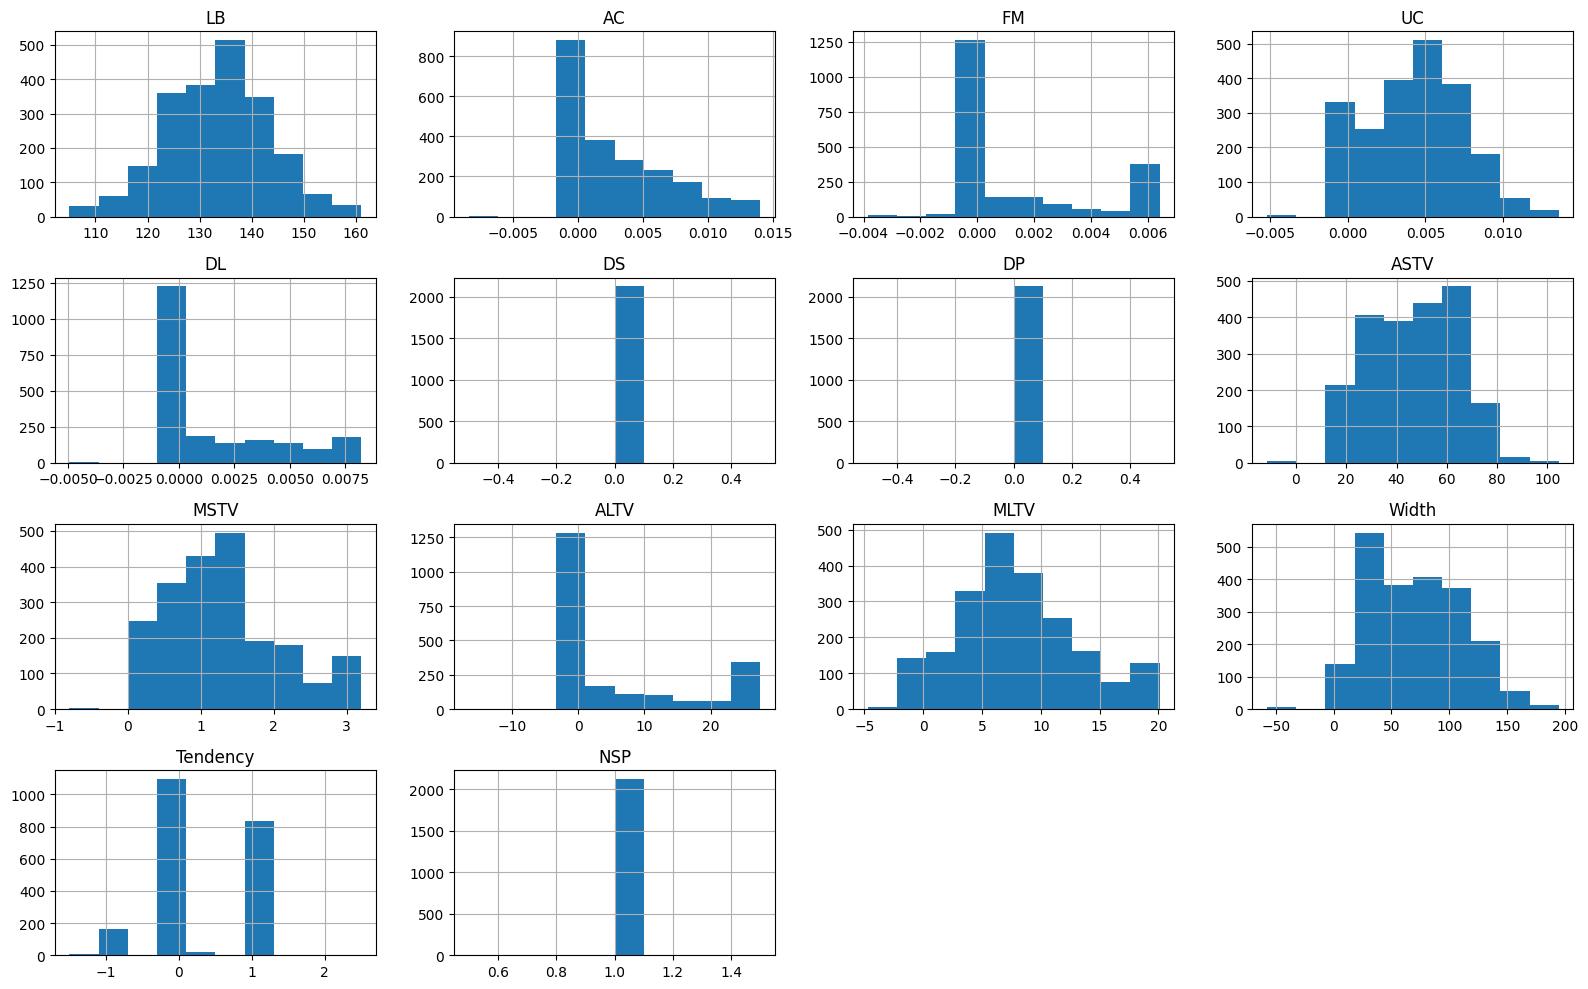

In [53]:
# Create histograms or boxplots to visualize the distributions of various numerical variables.

df.hist(figsize = (16,10))
plt.tight_layout()
plt.show()

In [56]:
df.drop(columns = ['DS','DP'], inplace = True)

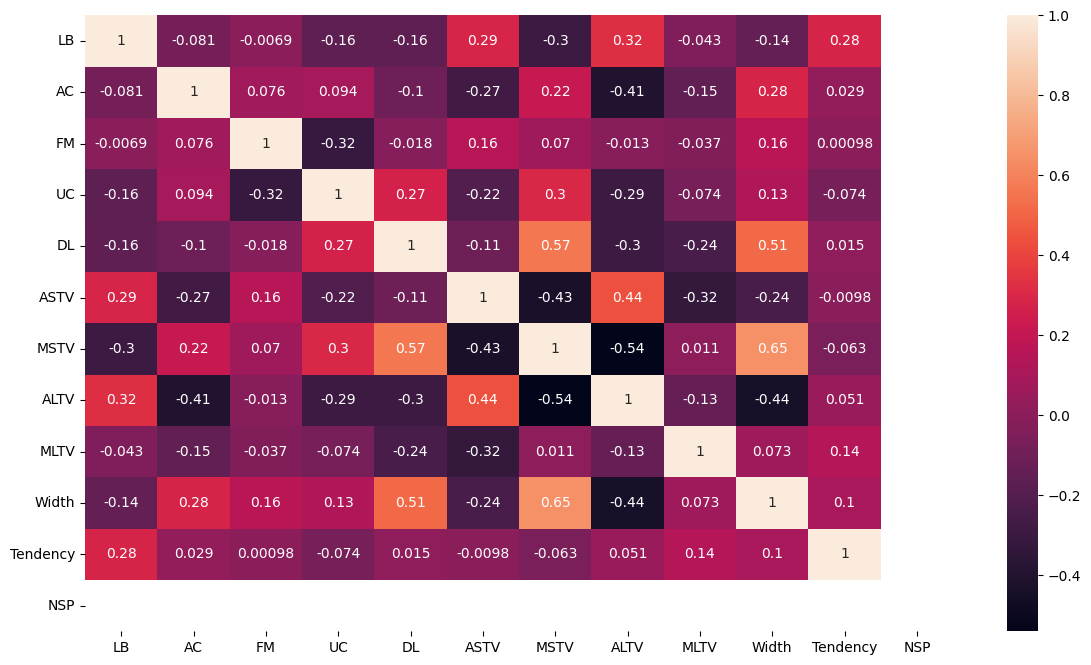

In [57]:
#Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

plt.figure(figsize=(14,8))
sns.heatmap(df.corr(numeric_only = True), annot = True) 
plt.show()

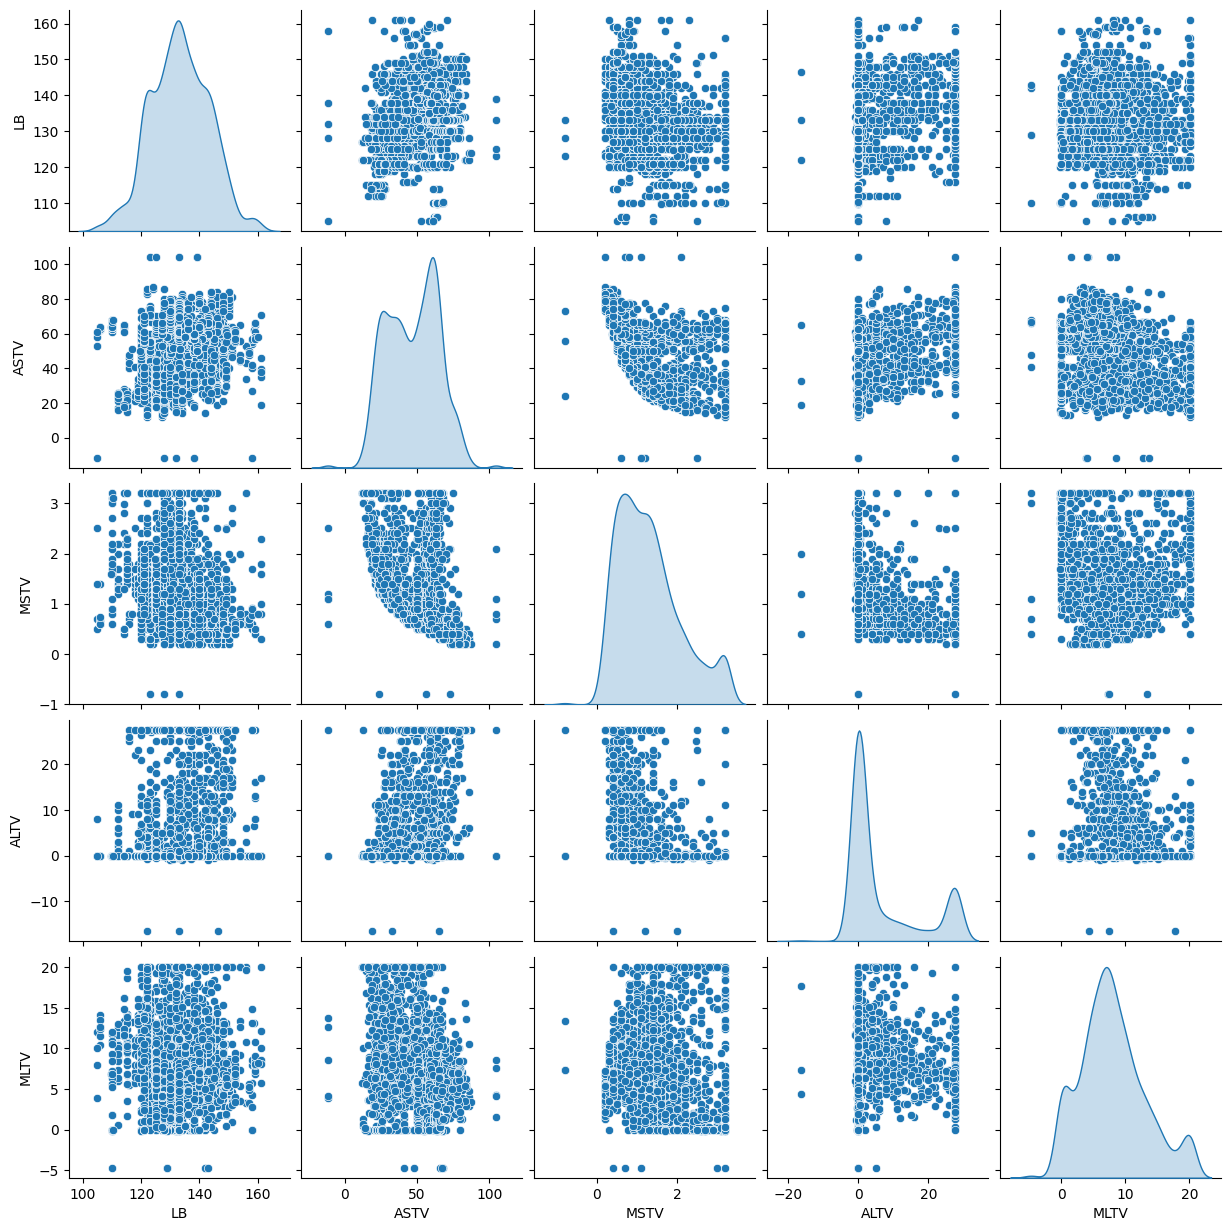

In [58]:
#Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

sns.pairplot(df[['LB','ASTV','MSTV',"ALTV",'MLTV']], diag_kind = 'kde')
plt.show()

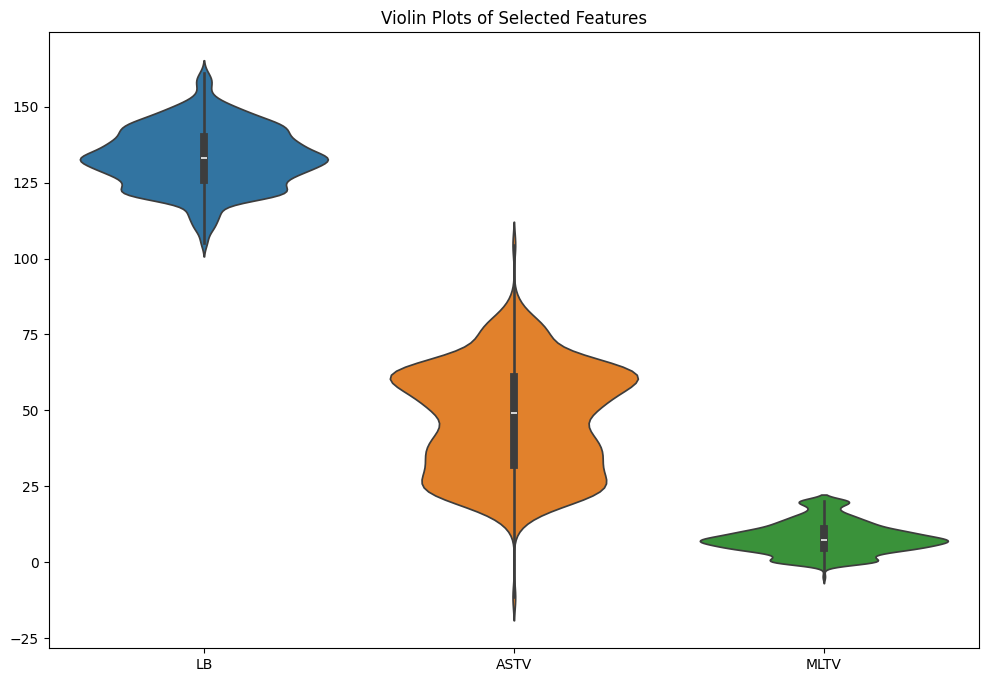

In [59]:
plt.figure(figsize = (12,8)) 
sns.violinplot(data=df[['LB','ASTV','MLTV']])
plt.title("Violin Plots of Selected Features")
plt.show()

In [25]:
#4.	Pattern Recognition and Insights:



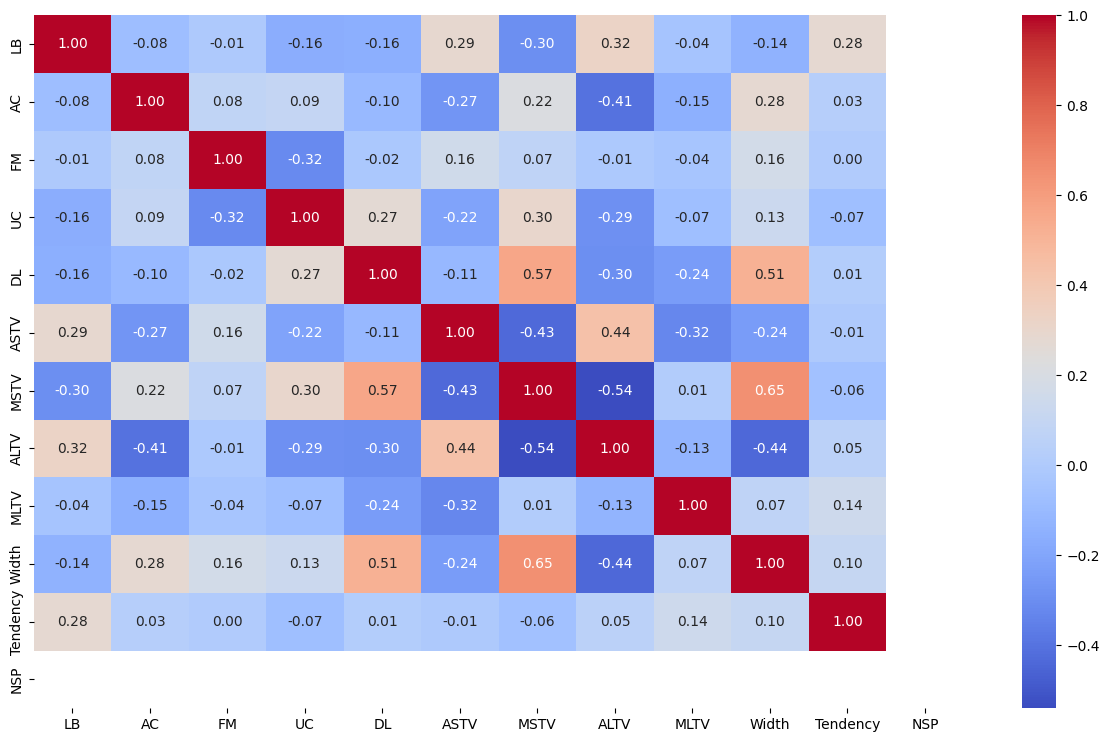

In [60]:
#Identify any correlations between variables and discuss their potential implications.  

plt.figure(figsize = (15,9))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [27]:
#Look for trends or patterns over time if temporal data is available.  
"""
LB (baseline) remains mostly stable, but some cases may show sharp drops before abnormal outcomes.
ASTV may trend upwards during stress conditions.
Features like MLTV, ALTV may show intermittent bursts rather than steady patterns.
In that heatmap DS, Dp column there is no value present and  NSP it present 1 value , after outlier it show that that these type of heatmap.
""" 

'\nLB (baseline) remains mostly stable, but some cases may show sharp drops before abnormal outcomes.\nASTV may trend upwards during stress conditions.\nFeatures like MLTV, ALTV may show intermittent bursts rather than steady patterns.\nIn that heatmap DS, Dp column there is no value present and  NSP it present 1 value , after outlier it show that that these type of heatmap.\n'

In [28]:
# conclusion
#Summary of Key Insights
"""
Distributions & Central Tendency: Baseline FHR (LB) is centered around 133 bpm with moderate variability, while features like AC, FM, DS, and DP are mostly zero, indicating sparse events.
Outliers & Data Quality: Several columns (ASTV, MSTV, ALTV, MLTV, Width) contain extreme values and some negative numbers that are likely invalid, requiring cleaning or capping.
Feature Relationships: Positive correlations exist among variability measures (ASTV, MSTV, MLTV), suggesting interdependence in fetal monitoring signals.
Temporal Patterns: Trends over time reveal fluctuations in baseline and variability features, which could indicate fetal stress or movement events.
Target Variable (NSP): Classes are imbalanced and may contain invalid values preprocessing is essential before modeling.
"""

#Implications for Analysis
"""
Preprocessing: Handle missing, invalid, and extreme values to improve data quality.
Feature Engineering: Sparse and variability features can be aggregated or combined to extract meaningful signals.
Predictive Modeling: Consider scaling, class balancing, and outlier treatment; temporal trends can be leveraged for real-time monitoring.
Clinical Insights: Understanding correlations and patterns can aid in early detection of fetal distress and support decision-making in medical contexts.
"""

'\nPreprocessing: Handle missing, invalid, and extreme values to improve data quality.\nFeature Engineering: Sparse and variability features can be aggregated or combined to extract meaningful signals.\nPredictive Modeling: Consider scaling, class balancing, and outlier treatment; temporal trends can be leveraged for real-time monitoring.\nClinical Insights: Understanding correlations and patterns can aid in early detection of fetal distress and support decision-making in medical contexts.\n'